This exercise will require you to pull some data from the Qunadl API. Qaundl is currently the most widely used aggregator of financial market data.

As a first step, you will need to register a free account on the http://www.quandl.com website.

After you register, you will be provided with a unique API key, that you should store:

In [1]:
# Store the API key as a string - according to PEP8, constants are always named in all upper case
API_KEY = '7koTmcJ8aytaf63ys5d5'

Qaundl has a large number of data sources, but, unfortunately, most of them require a Premium subscription. Still, there are also a good number of free datasets.

For this mini project, we will focus on equities data from the Frankfurt Stock Exhange (FSE), which is available for free. We'll try and analyze the stock prices of a company called Carl Zeiss Meditec, which manufactures tools for eye examinations, as well as medical lasers for laser eye surgery: https://www.zeiss.com/meditec/int/home.html. The company is listed under the stock ticker AFX_X.

You can find the detailed Quandl API instructions here: https://docs.quandl.com/docs/time-series

While there is a dedicated Python package for connecting to the Quandl API, we would prefer that you use the *requests* package, which can be easily downloaded using *pip* or *conda*. You can find the documentation for the package here: http://docs.python-requests.org/en/master/ 

Finally, apart from the *requests* package, you are encouraged to not use any third party Python packages, such as *pandas*, and instead focus on what's available in the Python Standard Library (the *collections* module might come in handy: https://pymotw.com/3/collections/ ).
Also, since you won't have access to DataFrames, you are encouraged to us Python's native data structures - preferably dictionaries, though some questions can also be answered using lists.
You can read more on these data structures here: https://docs.python.org/3/tutorial/datastructures.html

Keep in mind that the JSON responses you will be getting from the API map almost one-to-one to Python's dictionaries. Unfortunately, they can be very nested, so make sure you read up on indexing dictionaries in the documentation provided above.

In [5]:
# First, import the relevant modules
import requests
import json
import operator
import numpy as np


In [6]:
# Now, call the Quandl API and pull out a small sample of the data (only one day) to get a glimpse
# into the JSON structure that will be returned
start_date='2020-04-10'
end_date='2020-04-10'
url='https://www.quandl.com/api/v3/datasets/FSE/AFX_X.json?&start_date='+start_date+'&end_date='+end_date+'&api_key='+ API_KEY
res=requests.get(url)
print(res.text)

{"dataset":{"id":10095370,"dataset_code":"AFX_X","database_code":"FSE","name":"Carl Zeiss Meditec (AFX_X)","description":"Stock Prices for Carl Zeiss Meditec (2020-05-04) from the Frankfurt Stock Exchange.\u003cbr\u003e\u003cbr\u003eTrading System: Xetra\u003cbr\u003e\u003cbr\u003eISIN: DE0005313704","refreshed_at":"2020-05-15T22:16:15.603Z","newest_available_date":"2020-05-15","oldest_available_date":"2000-06-07","column_names":["Date","Open","High","Low","Close","Change","Traded Volume","Turnover","Last Price of the Day","Daily Traded Units","Daily Turnover"],"frequency":"daily","type":"Time Series","premium":false,"limit":null,"transform":null,"column_index":null,"start_date":"2020-04-10","end_date":"2020-04-10","data":[],"collapse":null,"order":null,"database_id":6129}}


In [7]:
# Inspect the JSON structure of the object you created, and take note of how nested it is,
# as well as the overall structure
res_json=res.json()
res_json

{'dataset': {'id': 10095370,
  'dataset_code': 'AFX_X',
  'database_code': 'FSE',
  'name': 'Carl Zeiss Meditec (AFX_X)',
  'description': 'Stock Prices for Carl Zeiss Meditec (2020-05-04) from the Frankfurt Stock Exchange.<br><br>Trading System: Xetra<br><br>ISIN: DE0005313704',
  'refreshed_at': '2020-05-15T22:16:15.603Z',
  'newest_available_date': '2020-05-15',
  'oldest_available_date': '2000-06-07',
  'column_names': ['Date',
   'Open',
   'High',
   'Low',
   'Close',
   'Change',
   'Traded Volume',
   'Turnover',
   'Last Price of the Day',
   'Daily Traded Units',
   'Daily Turnover'],
  'frequency': 'daily',
  'type': 'Time Series',
  'premium': False,
  'limit': None,
  'transform': None,
  'column_index': None,
  'start_date': '2020-04-10',
  'end_date': '2020-04-10',
  'data': [],
  'collapse': None,
  'order': None,
  'database_id': 6129}}

These are your tasks for this mini project:

1. Collect data from the Franfurt Stock Exchange, for the ticker AFX_X, for the whole year 2017 (keep in mind that the date format is YYYY-MM-DD).
2. Convert the returned JSON object into a Python dictionary.
3. Calculate what the highest and lowest opening prices were for the stock in this period.
4. What was the largest change in any one day (based on High and Low price)?
5. What was the largest change between any two days (based on Closing Price)?
6. What was the average daily trading volume during this year?
7. (Optional) What was the median trading volume during this year. (Note: you may need to implement your own function for calculating the median.)

In [8]:
start_date='2017-01-01'
end_date='2017-12-31'
url='https://www.quandl.com/api/v3/datasets/FSE/AFX_X.json?&start_date='+start_date+'&end_date='+end_date+'&api_key='+ API_KEY
res=requests.get(url)
print(res.status_code)

200


In [9]:
res_json=res.json()
type(res_json)

dict

# 2. Calculate what the highest and lowest opening prices were for the stock in this period.

In [10]:
res_json.keys()

dict_keys(['dataset'])

In [11]:
res_json['dataset'].keys()

dict_keys(['id', 'dataset_code', 'database_code', 'name', 'description', 'refreshed_at', 'newest_available_date', 'oldest_available_date', 'column_names', 'frequency', 'type', 'premium', 'limit', 'transform', 'column_index', 'start_date', 'end_date', 'data', 'collapse', 'order', 'database_id'])

In [12]:
res_json['dataset']['column_names']

['Date',
 'Open',
 'High',
 'Low',
 'Close',
 'Change',
 'Traded Volume',
 'Turnover',
 'Last Price of the Day',
 'Daily Traded Units',
 'Daily Turnover']

In [14]:
# makin a data frame
df=pd.DataFrame(res_json['dataset']['data'])
df.columns=res_json['dataset']['column_names']

In [15]:
df.head()

,Date,Open,High,Low,Close,Change,Traded Volume,Turnover,Last Price of the Day,Daily Traded Units,Daily Turnover
0,2017-12-29,51.76,51.94,51.45,51.76,NaN,34640.0,1792304.0,None,None,None
1,2017-12-28,51.65,51.82,51.43,51.60,NaN,40660.0,2099024.0,None,None,None
2,2017-12-27,51.45,51.89,50.76,51.82,NaN,57452.0,2957018.0,None,None,None
3,2017-12-22,51.05,51.50,50.92,51.32,NaN,71165.0,3641949.0,None,None,None
4,2017-12-21,51.16,51.52,50.90,51.40,NaN,120649.0,6179433.0,None,None,None


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 11 columns):
Date                     255 non-null object
Open                     252 non-null float64
High                     255 non-null float64
Low                      255 non-null float64
Close                    255 non-null float64
Change                   1 non-null float64
Traded Volume            255 non-null float64
Turnover                 255 non-null float64
Last Price of the Day    0 non-null object
Daily Traded Units       0 non-null object
Daily Turnover           0 non-null object
dtypes: float64(7), object(4)
memory usage: 22.0+ KB


In [17]:
# converting date column to datetype
df['Date']=pd.to_datetime(df['Date'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 11 columns):
Date                     255 non-null datetime64[ns]
Open                     252 non-null float64
High                     255 non-null float64
Low                      255 non-null float64
Close                    255 non-null float64
Change                   1 non-null float64
Traded Volume            255 non-null float64
Turnover                 255 non-null float64
Last Price of the Day    0 non-null object
Daily Traded Units       0 non-null object
Daily Turnover           0 non-null object
dtypes: datetime64[ns](1), float64(7), object(3)
memory usage: 22.0+ KB


In [19]:
# sorty by date and making index and date column
df.sort_values(by='Date',inplace=True)
df.index=df.Date
df.drop(columns='Date',inplace=True)
df.head()

,Open,High,Low,Close,Change,Traded Volume,Turnover,Last Price of the Day,Daily Traded Units,Daily Turnover
Date,,,,,,,,,,
2017-01-02,34.99,35.94,34.99,35.80,NaN,44700.0,1590561.0,None,None,None
2017-01-03,35.90,35.93,35.34,35.48,NaN,70618.0,2515473.0,None,None,None
2017-01-04,35.48,35.51,34.75,35.19,NaN,54408.0,1906810.0,None,None,None
2017-01-05,35.02,35.20,34.73,35.06,NaN,48412.0,1692326.0,None,None,None
2017-01-06,34.91,35.21,34.91,35.04,NaN,27507.0,964046.0,None,None,None


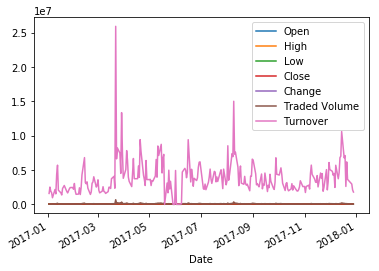

In [21]:
import matplotlib.pyplot as plt
df.plot()
plt.show()

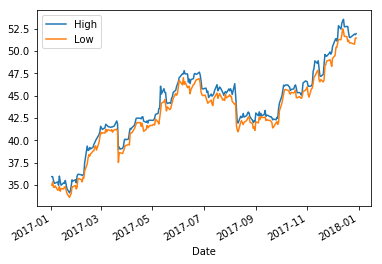

In [23]:
# max & min plot
df_max_min=df[['High','Low']]
df_max_min.plot()
plt.show()

## 3. What was the largest change in any one day (based on High and Low price)?

/home/kiran/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


Text(0.5,1,'Change in a day')

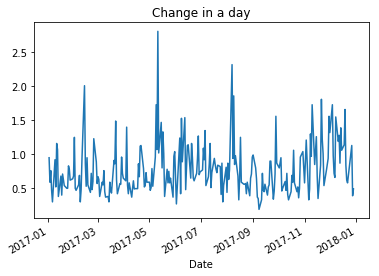

In [24]:
df.largest_change=df.High-df.Low
df_change=df.largest_change

df_change.plot()
plt.title('Change in a day')

In [25]:
print('largest change in a day: ',max(df_change))

largest change in a day:  2.8100000000000023


## What was the largest change between any two days (based on Closing Price)?

In [26]:
df.Close_prev=df.Close.shift(1).fillna(method='bfill')

/home/kiran/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


Text(0.5,1,'Change between two days')

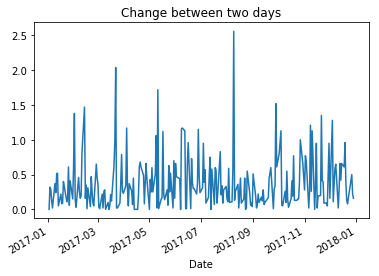

In [27]:

df_change_prev=abs(df.Close-df.Close_prev)
df_change_prev.plot()
plt.title('Change between two days')

In [28]:
print('Maximum change over consecutive days: ',max(df_change_prev))

Maximum change over consecutive days:  2.559999999999995
